In [1]:
import os
import numpy as np
import copy
from pyuvdata import UVBeam
from pyuvdata.data import DATA_PATH
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filenames = ['HERA_NicCST_150MHz.txt', 'HERA_NicCST_123MHz.txt']
cst_files = [os.path.join(DATA_PATH, f) for f in filenames]

In [3]:
power_beam = UVBeam()
power_beam.read_cst_beam(cst_files[0], beam_type='power', frequency=150e6,
                         telescope_name='TEST', feed_name='bob',
                         feed_version='0.1', feed_pol=['x'],
                         model_name='E-field pattern - Rigging height 4.9m',
                         model_version='1.0')
power_beam_hpx = copy.deepcopy(power_beam)
power_beam_hpx.az_za_to_healpix()

In [4]:
efield_beam = UVBeam()
efield_beam.read_cst_beam(cst_files[0], beam_type='efield', frequency=150e6,
                          telescope_name='TEST', feed_name='bob',
                          feed_version='0.1', feed_pol=['x'],
                          model_name='E-field pattern - Rigging height 4.9m',
                          model_version='1.0')
efield_beam_pwr = copy.deepcopy(efield_beam)
efield_beam_pwr.efield_to_power(calc_cross_pols=False)
efield_beam_hpx = copy.deepcopy(efield_beam)
efield_beam_hpx.az_za_to_healpix()
efield_beam_hpx_pwr = copy.deepcopy(efield_beam_hpx)
efield_beam_hpx_pwr.efield_to_power(calc_cross_pols=False)

In [37]:
sq_then_hp = efield_beam_pwr.az_za_to_healpix(inplace=False)

In [5]:
print(efield_beam.data_array.shape)
print(efield_beam_hpx.data_array.shape)

(2, 1, 2, 1, 181, 360)
(2, 1, 2, 1, 49152)


In [6]:
print(power_beam.data_array.shape)
print(power_beam_hpx.data_array.shape)

(1, 1, 2, 1, 181, 360)
(1, 1, 2, 1, 49152)


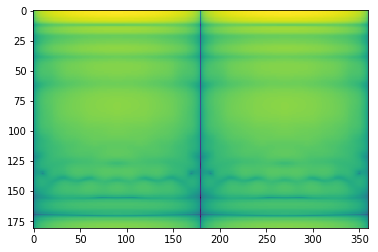

In [7]:
plt.imshow(np.log10(np.abs(efield_beam.data_array[0,0,0,0,:,:])), aspect='auto')

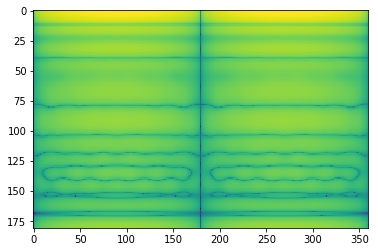

In [8]:
plt.imshow(np.log10(np.abs(efield_beam.data_array[0,0,0,0,:,:].real)), aspect='auto')

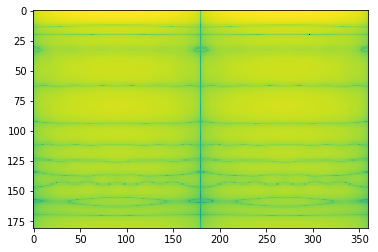

In [9]:
plt.imshow(np.log10(np.abs(efield_beam.data_array[0,0,0,0,:,:].imag)), aspect='auto')

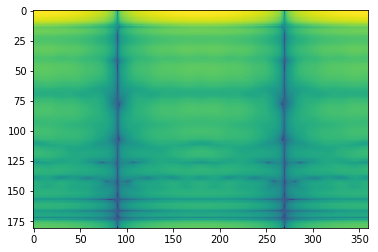

In [10]:
plt.imshow(np.log10(np.abs(efield_beam.data_array[1,0,0,0,:,:])), aspect='auto')

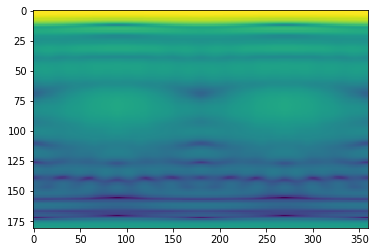

In [11]:
plt.imshow(np.log10(efield_beam_pwr.data_array[0,0,0,0,:,:]), aspect='auto')

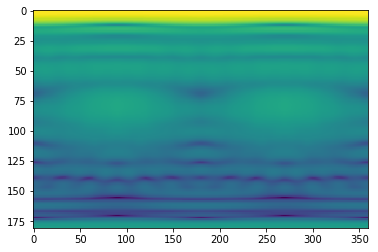

In [12]:
plt.imshow(np.log10(power_beam.data_array[0,0,0,0,:,:]), aspect='auto')

divide by zero encountered in log10


-1.8135
1.9649
0.001758565621


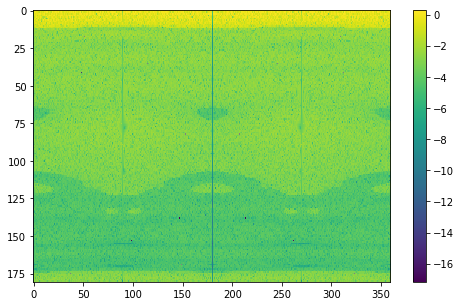

In [36]:
diff_rect = efield_beam_pwr.data_array-power_beam.data_array
plt.figure(figsize=(8,5))
plt.imshow(np.log10(np.abs(diff_rect)[0,0,0,0,:,:]), aspect='auto')
plt.colorbar()
print diff_rect.min()
print diff_rect.max()
print (diff_rect/power_beam.data_array).max()

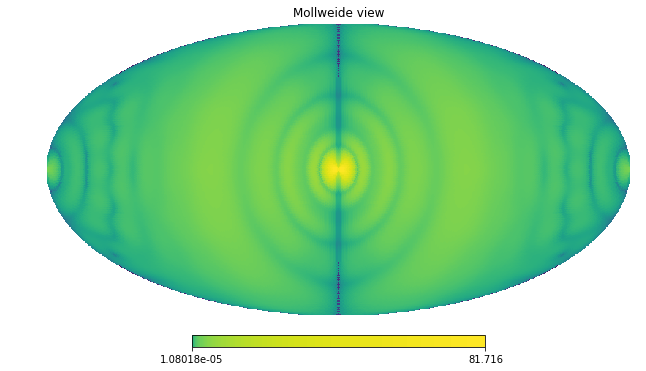

In [13]:
hp.mollview(np.abs(efield_beam_hpx.data_array[0,0,0,0,:]), rot=[0,90], norm='log')

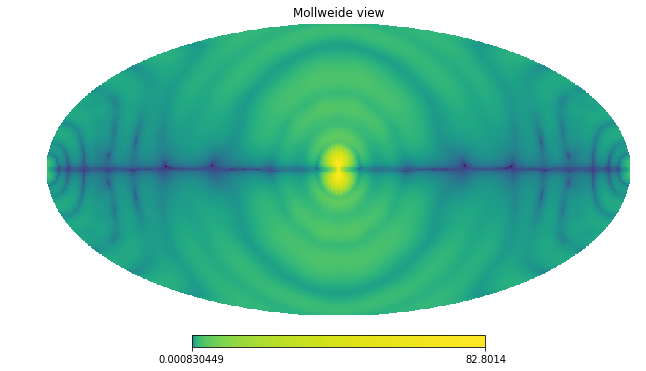

In [14]:
hp.mollview(np.abs(efield_beam_hpx.data_array[1,0,0,0,:]), rot=[0,90], norm='log')

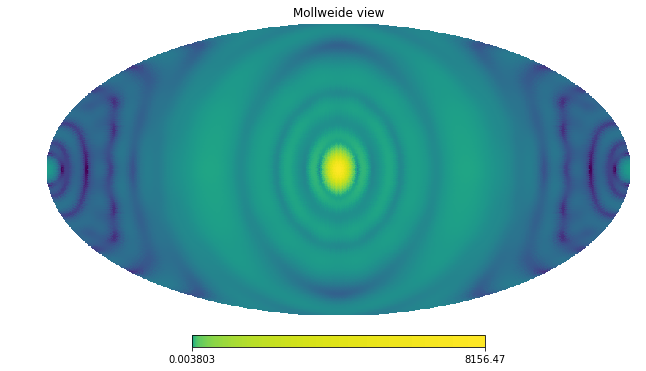

In [15]:
hp.mollview(efield_beam_hpx_pwr.data_array[0,0,0,0,:], rot=[0,90], norm='log')

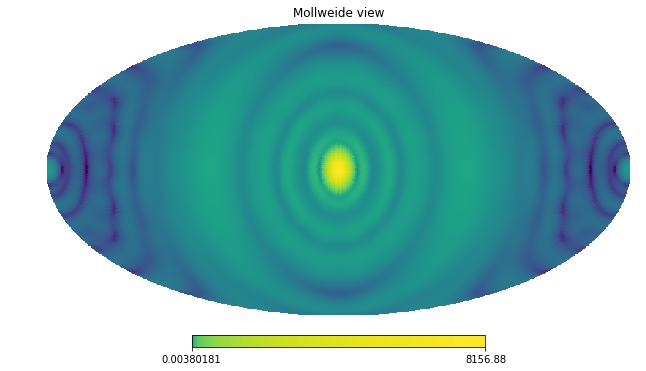

In [16]:
hp.mollview(power_beam_hpx.data_array[0,0,0,0,:], rot=[0,90], norm='log')

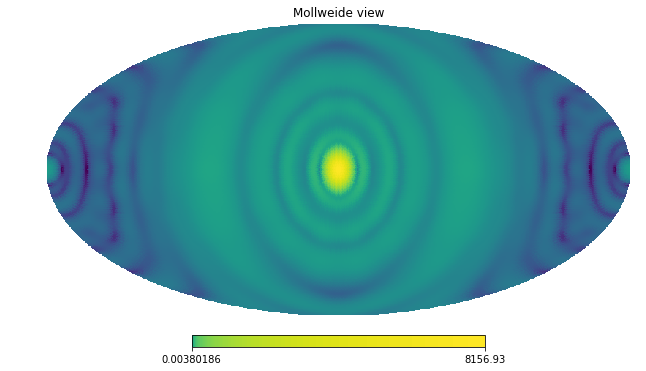

In [38]:
hp.mollview(sq_then_hp.data_array[0,0,0,0,:], rot=[0,90], norm='log')

In [39]:
diff = power_beam_hpx.data_array - efield_beam_hpx_pwr.data_array
diff_sq_then_hp = efield_beam_hpx_pwr.data_array - sq_then_hp.data_array

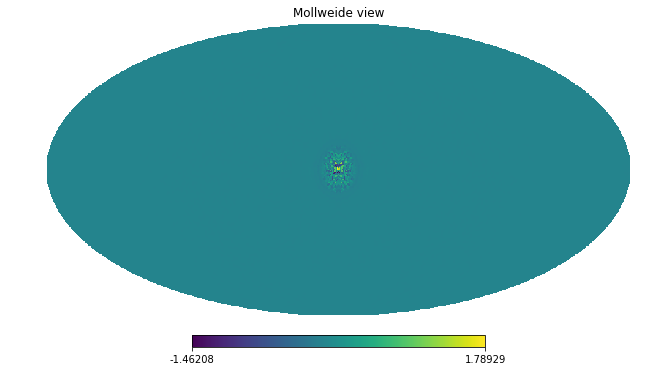

In [19]:
hp.mollview(diff[0,0,0,0,:], rot=[0,90])
#hp.graticule()

In [20]:
print(np.max(diff))
print(np.min(diff))

1.78928919749
-1.46208277207


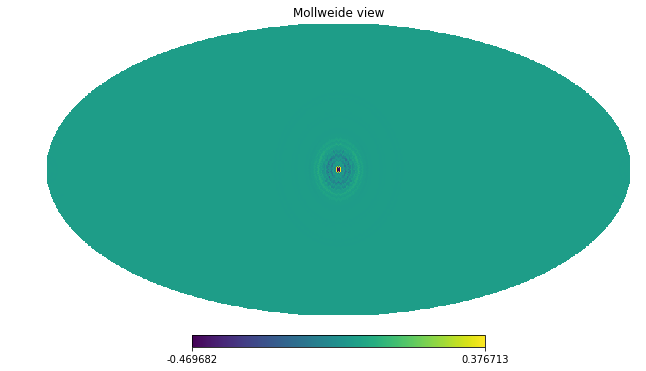

In [40]:
hp.mollview(diff_sq_then_hp[0,0,0,0,:], rot=[0,90])

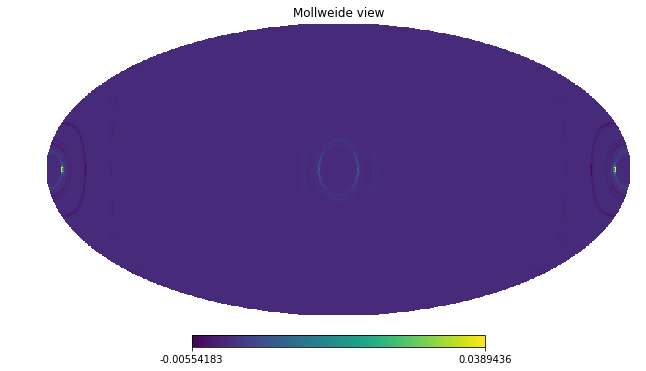

In [42]:
hp.mollview((diff_sq_then_hp/efield_beam_hpx_pwr.data_array)[0,0,0,0,:], rot=[0,90])

In [21]:
ratio = diff / power_beam_hpx.data_array

In [22]:
print(np.max(ratio))
print(np.min(ratio))

0.00728449167605
-0.0415691629269


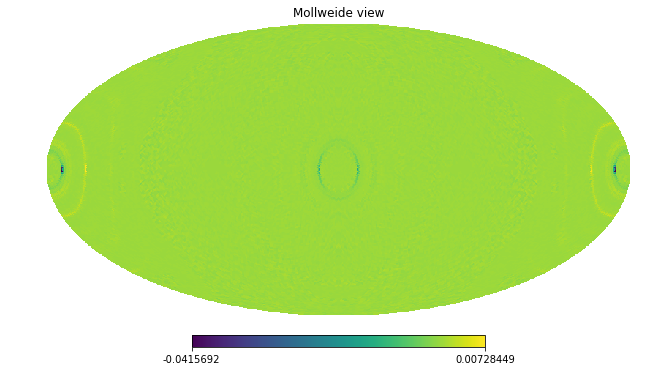

In [24]:
hp.mollview(ratio[0,0,0,0,:], rot=[0,90])
#hp.graticule()